In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# impodting the dataset
dataset = pd.read_csv('movie_metadata.csv')

In [3]:
dataset.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
#dataset shape
dataset.shape

(5043, 28)

<AxesSubplot:>

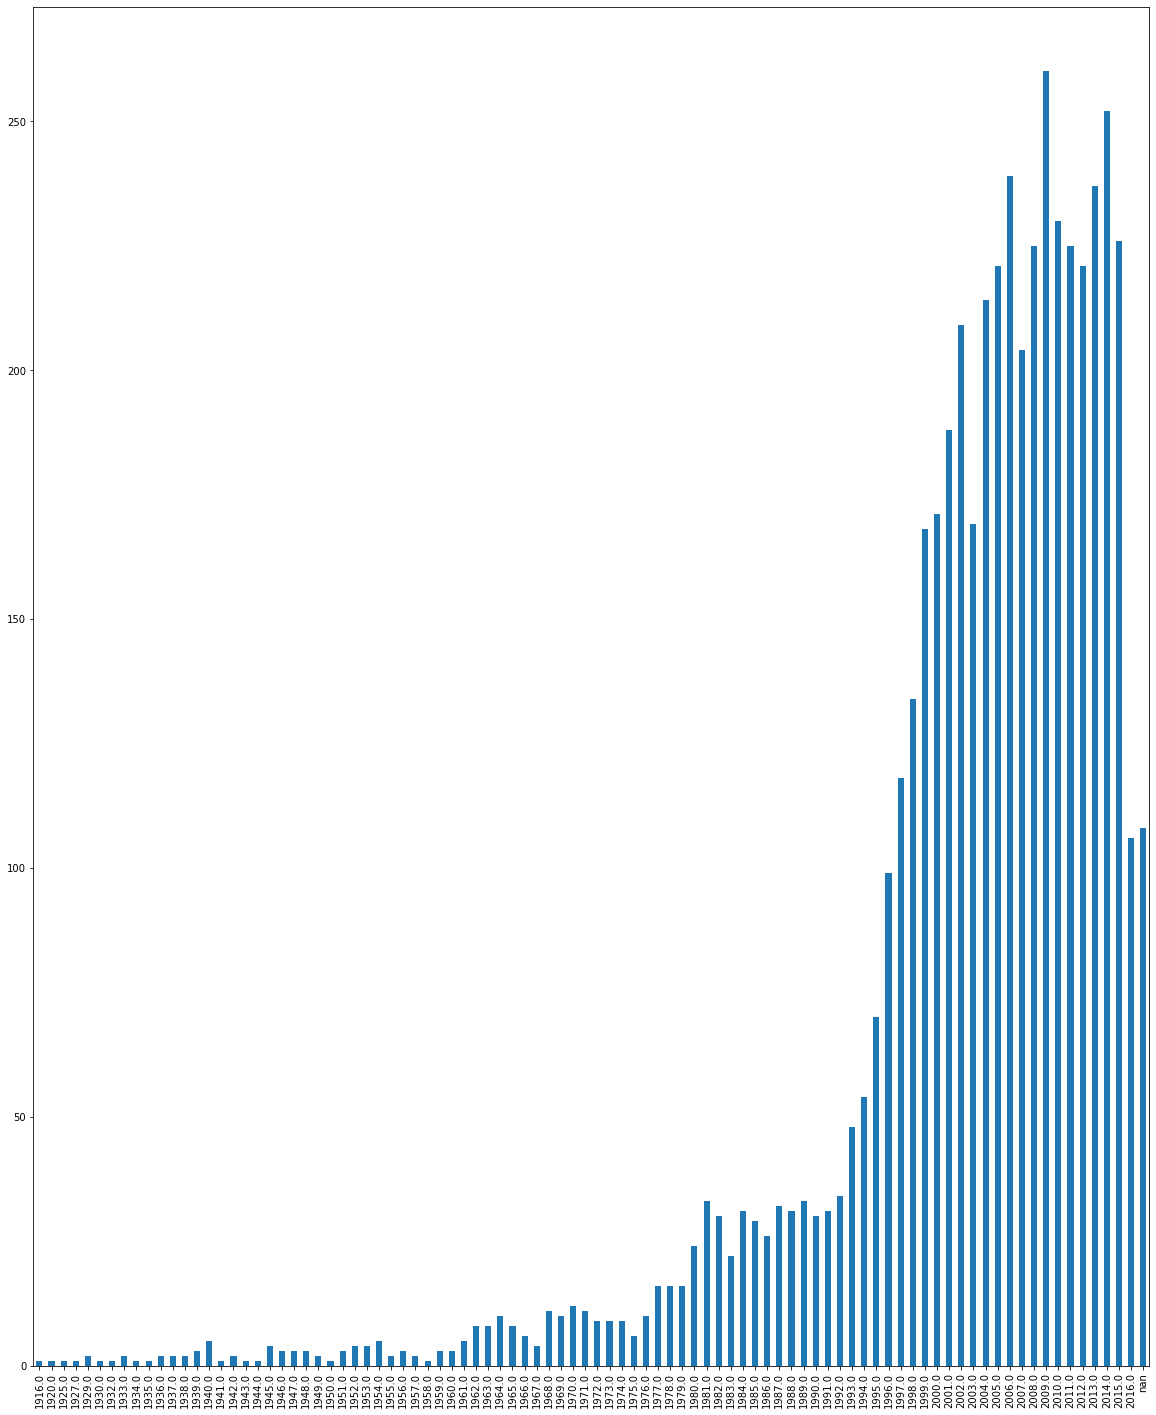

In [9]:
# showing the dataset
# kind = The kind of plot to produce, kind='barh'(horizantal bar)
# And data we have upto 2016
dataset.title_year.value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(20,25))

In [6]:
#dataset columns
dataset.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
dataset['country']

0          USA
1          USA
2           UK
3          USA
4          NaN
         ...  
5038    Canada
5039       USA
5040       USA
5041       USA
5042       USA
Name: country, Length: 5043, dtype: object

In [8]:
# taking the neccessary feartures
dataset = dataset.loc[:, ['director_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'actor_2_name']]

In [9]:
dataset.head()

,director_name,genres,actor_1_name,movie_title,actor_3_name,actor_2_name
0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,Joel David Moore
1,Gore Verbinski,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,Orlando Bloom
2,Sam Mendes,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,Rory Kinnear
3,Christopher Nolan,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,Christian Bale
4,Doug Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,Rob Walker


In [10]:
dataset['genres'] = dataset['genres'].str.replace("|", " ")

<ipython-input-10-d8a3f94af028>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dataset['genres'] = dataset['genres'].str.replace("|", " ")


In [11]:
dataset

,director_name,genres,actor_1_name,movie_title,actor_3_name,actor_2_name
0,James Cameron,Action Adventure Fantasy Sci-Fi,CCH Pounder,Avatar,Wes Studi,Joel David Moore
1,Gore Verbinski,Action Adventure Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,Orlando Bloom
2,Sam Mendes,Action Adventure Thriller,Christoph Waltz,Spectre,Stephanie Sigman,Rory Kinnear
3,Christopher Nolan,Action Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,Christian Bale
4,Doug Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,Rob Walker
...,...,...,...,...,...,...
5038,Scott Smith,Comedy Drama,Eric Mabius,Signed Sealed Delivered,Crystal Lowe,Daphne Zuniga
5039,NaN,Crime Drama Mystery Thriller,Natalie Zea,The Following,Sam Underwood,Valorie Curry
5040,Benjamin Roberds,Drama Horror Thriller,Eva Boehnke,A Plague So Pleasant,David Chandler,Maxwell Moody
5041,Daniel Hsia,Comedy Drama Romance,Alan Ruck,Shanghai Calling,Eliza Coupe,Daniel Henney


In [12]:
# re-ordering the movie_title
dataset['movie_title'] = dataset['movie_title'].apply(lambda x: x[:-1])
dataset['movie_title'] = dataset['movie_title'].str.lower()

In [13]:
dataset.head()

,director_name,genres,actor_1_name,movie_title,actor_3_name,actor_2_name
0,James Cameron,Action Adventure Fantasy Sci-Fi,CCH Pounder,avatar,Wes Studi,Joel David Moore
1,Gore Verbinski,Action Adventure Fantasy,Johnny Depp,pirates of the caribbean: at world's end,Jack Davenport,Orlando Bloom
2,Sam Mendes,Action Adventure Thriller,Christoph Waltz,spectre,Stephanie Sigman,Rory Kinnear
3,Christopher Nolan,Action Thriller,Tom Hardy,the dark knight rises,Joseph Gordon-Levitt,Christian Bale
4,Doug Walker,Documentary,Doug Walker,star wars: episode vii - the force awakens ...,NaN,Rob Walker


In [14]:
dataset['comb'] = dataset['actor_1_name'] + ' ' + dataset['actor_2_name'] + ' '+ dataset['actor_3_name'] + ' '+ dataset['director_name'] +' ' + dataset['genres']

## Preprocessing the 2017 data

In [15]:
# importing the credit dataset (taken it from kaggle)
credit_data = pd.read_csv('credits.csv')

In [16]:
# sigle cast value
credit_data

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [17]:
# single crew value
#credit_data['cast'].dtype

In [18]:
# converting the cast values string to list
#import ast
#credit_data['cast'] = credit_data['cast'].apply(lambda x: ast.literal_eval(x))

In [19]:
#type(credit_data['cast'][0])

In [20]:
# converting the crew values string to list
#credit_data['crew'] = credit_data['crew'].apply(lambda x: ast.literal_eval(x))

### Import the 2017 movie data

In [21]:
# impoting the new movies data which has the latest movie data
meta_data = pd.read_csv('movies_metadata.csv')

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
meta_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [23]:
meta_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [24]:
# converting the str of the release_date to pandas date time
meta_data['year'] = pd.to_datetime(meta_data['release_date'], errors='coerce').dt.year

In [25]:
meta_data['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [26]:
# taking only 2017 movies, because we already have the enough data for below year 2017
new_meta_data = meta_data.loc[meta_data['year']==2017, ['genres','id','title','year']]

In [27]:
new_meta_data['year'].value_counts()

2017.0    532
Name: year, dtype: int64

In [28]:
type(new_meta_data['id'])

pandas.core.series.Series

In [29]:
# to merge the credits and new mata data we need to connvert the id values to integer
new_meta_data['id'] = new_meta_data['id'].astype(int)

In [30]:
# merge the data in from two datasets based on the id value
merge_data = pd.merge(new_meta_data, credit_data, on='id')

In [31]:
merge_data.head()

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."


In [32]:
# converting the string values to list values
import ast
merge_data['genres'] = merge_data['genres'].map(lambda x: ast.literal_eval(x))
merge_data['cast'] = merge_data['cast'].map(lambda x: ast.literal_eval(x))
merge_data['crew'] = merge_data['crew'].map(lambda x: ast.literal_eval(x))

In [33]:
# making the genreslist 
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [34]:
#pre-format the data
merge_data['genres_list'] = merge_data['genres'].map(lambda x: make_genresList(x))

In [35]:
# get the actor 1 names
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [36]:
merge_data['actor_1_name'] = merge_data['cast'].map(lambda x: get_actor1(x))

In [37]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [38]:
merge_data['actor_2_name'] = merge_data['cast'].map(lambda x: get_actor2(x))

In [39]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [40]:
merge_data['actor_3_name'] = merge_data['cast'].map(lambda x: get_actor3(x))

In [41]:
# get the directors names 
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [42]:
# get the director names
merge_data['director_name'] = merge_data['crew'].map(lambda x: get_directors(x))

In [43]:
# movie data
movie = merge_data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [44]:
# check the null values from the list
movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [45]:
# droping the null values from the dataset
movie = movie.dropna(how='any')

In [46]:
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [47]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [48]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [49]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [50]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachi...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett ...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gu...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Se...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield ...
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Loui...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden...


In [51]:
new_data = dataset.append(movie)

In [52]:
new_data

,director_name,genres,actor_1_name,movie_title,actor_3_name,actor_2_name,comb
0,James Cameron,Action Adventure Fantasy Sci-Fi,CCH Pounder,avatar,Wes Studi,Joel David Moore,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Action Adventure Fantasy,Johnny Depp,pirates of the caribbean: at world's end,Jack Davenport,Orlando Bloom,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Action Adventure Thriller,Christoph Waltz,spectre,Stephanie Sigman,Rory Kinnear,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Action Thriller,Tom Hardy,the dark knight rises,Joseph Gordon-Levitt,Christian Bale,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Documentary,Doug Walker,star wars: episode vii - the force awakens ...,NaN,Rob Walker,NaN
...,...,...,...,...,...,...,...
524,Jim Strouse,Romance Comedy,Jessica Williams,the incredible jessica james,Keith Stanfield,Chris O'Dowd,Jessica Williams Chris O'Dowd Keith Stanfield ...
525,Farhad Mann,Romance,Adelaide Kane,can't buy my love,Jean Louisa Kelly,Benjamin Hollingsworth,Adelaide Kane Benjamin Hollingsworth Jean Loui...
526,Hannaleena Hauru,Romance Comedy,Inka Haapamäki,thick lashes of lauri mäntyvaara,Tiitus Rantala,Rosa Honkonen,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
527,Jonathan A. Rosenbaum,Crime Comedy Action Family,Lou Diamond Phillips,cop and a half: new recruit,Gina Holden,Wallace Shawn,Lou Diamond Phillips Wallace Shawn Gina Holden...


## Extracting features of 2018 movies from Wikipedia

In [53]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [54]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [55]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],NaN
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",[4],NaN
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5],NaN
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6],NaN
...,...,...,...,...,...,...,...
266,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,Etan Cohen (director/screenplay); Will Ferrell...,NaN,[164]
267,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,NaN,[137]
268,DECEMBER,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,NaN,[227]
269,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfre...",NaN,[259]


In [56]:
#!pip install tmdbv3api

In [57]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '52ce79633e7e4696ad1067095d884844'

In [58]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

In [59]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [60]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,genres
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN,Horror Mystery Thriller
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],NaN,Thriller Drama
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",[4],NaN,Action Thriller
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5],NaN,Drama History Western
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6],NaN,Action Thriller
...,...,...,...,...,...,...,...,...
266,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,Etan Cohen (director/screenplay); Will Ferrell...,NaN,[164],Mystery Adventure Comedy Crime
267,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,NaN,[137],Drama History Comedy
268,DECEMBER,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,NaN,[227],Drama History
269,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfre...",NaN,[259],Thriller Crime Drama Action


In [61]:
df_2018 = df[['Title','Cast and crew','genres']]

In [62]:
df_2018.head(5)

,Title,Cast and crew,genres
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Drama History Western
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller


In [63]:
# get the director
def get_director2018(director):
    if " (director);" in director:
        return director.split(" (director);")[0]
    elif " (directors)" in director:
        return director.split(" (director);")[0]
    elif " (directors/screenplay)" in director:
        return director.split(" (directors/screenplay);")[0]

In [64]:
df_2018['director_name'] = df_2018['Cast and crew'].apply(lambda x: get_director2018(x))

<ipython-input-64-253db67fa766>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name'] = df_2018['Cast and crew'].apply(lambda x: get_director2018(x))


In [65]:
df_2018

,Title,Cast and crew,genres,director_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller,Adam Robitel
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,Lauren Wolkstein
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,Simon West
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Drama History Western,Warwick Thornton
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller,Jaume Collet-Serra
...,...,...,...,...
266,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Mystery Adventure Comedy Crime,None
267,Vice,Adam McKay (director/screenplay); Christian Ba...,Drama History Comedy,None
268,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History,Mimi Leder
269,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...",Thriller Crime Drama Action,Karyn Kusama


In [66]:
# get actor 1 data
def get_actor_1_2018(actor):
    return actor.split(" (screenplay);")[-1].split(", ")[0]

In [67]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].apply(lambda x: get_actor_1_2018(actor=x))

<ipython-input-67-31b9bad468e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name'] = df_2018['Cast and crew'].apply(lambda x: get_actor_1_2018(actor=x))


In [68]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller,Adam Robitel,Lin Shaye
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,Lauren Wolkstein,Lauren Wolkstein (director); Christopher Radcl...
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,Simon West,Dominic Cooper
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Drama History Western,Warwick Thornton,Bryan Brown
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller,Jaume Collet-Serra,Liam Neeson
...,...,...,...,...,...
266,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Mystery Adventure Comedy Crime,None,Etan Cohen (director/screenplay); Will Ferrell
267,Vice,Adam McKay (director/screenplay); Christian Ba...,Drama History Comedy,None,Adam McKay (director/screenplay); Christian Bale
268,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History,Mimi Leder,Felicity Jones
269,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...",Thriller Crime Drama Action,Karyn Kusama,Nicole Kidman


In [69]:
# director_name	genres	actor_1_name	movie_title	actor_3_name	actor_2_name	comb
# get actor 1 data
def get_actor_2_2018(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [70]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].apply(lambda x: get_actor_2_2018(x))

<ipython-input-70-645984723a1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name'] = df_2018['Cast and crew'].apply(lambda x: get_actor_2_2018(x))


In [71]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [72]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

<ipython-input-72-c6969dc4d5e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))


In [73]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})

In [74]:
df_2018

,movie_title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,Lauren Wolkstein,Lauren Wolkstein (director); Christopher Radcl...,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Drama History Western,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
...,...,...,...,...,...,...,...
266,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Mystery Adventure Comedy Crime,None,Etan Cohen (director/screenplay); Will Ferrell,John C. Reilly,Rebecca Hall
267,Vice,Adam McKay (director/screenplay); Christian Ba...,Drama History Comedy,None,Adam McKay (director/screenplay); Christian Bale,Amy Adams,Steve Carell
268,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux
269,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...",Thriller Crime Drama Action,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell


In [75]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [76]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,Insidious: The Last Key
1,Lauren Wolkstein,Lauren Wolkstein (director); Christopher Radcl...,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Drama History Western,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,The Commuter
...,...,...,...,...,...,...
266,None,Etan Cohen (director/screenplay); Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,Holmes & Watson
267,None,Adam McKay (director/screenplay); Christian Bale,Amy Adams,Steve Carell,Drama History Comedy,Vice
268,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex
269,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,Destroyer


In [77]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [78]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

In [79]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']

## Extracting features of 2019 movies from Wikipedia

In [80]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [81]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [82]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,4,Escape Room,Columbia Pictures,"Adam Robitel (director); Bragi F. Schut, Maria...",[2]
1,JANUARY,4,Rust Creek,IFC Films,Jen McGowan (director); Julie Lipson (screenpl...,[3]
2,JANUARY,4,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,[4]
3,JANUARY,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,[5]
4,JANUARY,11,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...,[6]
...,...,...,...,...,...,...
237,DECEMBER,25,Spies in Disguise,20th Century Fox / Blue Sky Studios / Chernin ...,"Nick Bruno, Troy Quane (directors); Brad Copel...",[132]
238,DECEMBER,25,Little Women,Columbia Pictures / Regency Enterprises,Greta Gerwig (director/screenplay); Saoirse Ro...,[221]
239,DECEMBER,25,1917,Universal Pictures / DreamWorks Pictures,Sam Mendes (director/screenplay); Krysty Wilso...,[222]
240,DECEMBER,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), A...",[223]


In [83]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
df_2019 = df[['Title','Cast and crew','genres']]

In [ ]:
def get_director_2019(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director_2019(str(x)))

In [ ]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [ ]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))

In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))

In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

In [ ]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})

In [ ]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [ ]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
new_df19['movie_title'] = new_df19['movie_title'].str.lower()

In [ ]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']

In [ ]:
my_df = new_df18.append(new_df19,ignore_index=True)

In [ ]:
old_df = credit_data

In [ ]:
final_df = old_df.append(my_df,ignore_index=True)

In [ ]:
final_df.isna().sum()

In [ ]:
final_df = final_df.dropna(how='any')

In [ ]:
final_df.isna().sum()

In [ ]:
final_df.head()

### data preprocessing 4

In [ ]:
import pandas as pd
import numpy as np
import requests
import bs4 as bs
import urllib.request

## Extracting features of 2020 movies from Wikipedia

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

In [ ]:
# web scraping
source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [ ]:
tables = soup.find_all('table',class_='wikitable sortable')

In [ ]:
len(tables)

In [ ]:
type(tables[0])

In [ ]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

In [ ]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [ ]:
df_2020 = df[['Title','Cast and crew']]

In [ ]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '52ce79633e7e4696ad1067095d884844'

In [ ]:
from tmdbv3api import Movie
tmdb_movie = Movie() 
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
      movie_id = result[0].id
      response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
      data_json = response.json()
      if data_json['genres']:
          genre_str = " " 
          for i in range(0,len(data_json['genres'])):
              genres.append(data_json['genres'][i]['name'])
          return genre_str.join(genres)
      else:
          return np.NaN

In [ ]:
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))

In [ ]:
def get_actor_1_2020(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [ ]:
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor_1_2020(str(x)))

In [ ]:
def get_actor_2_2020(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor_2_2020(str(x)))

In [ ]:
def get_actor_3_2020(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [ ]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})

In [ ]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [ ]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']

In [ ]:
new_df20.isna().sum()

In [ ]:
new_df20 = new_df20.dropna(how='any')

In [ ]:
new_df20.isna().sum()

In [ ]:
new_df20['movie_title'] = new_df20['movie_title'].str.lower()

In [ ]:
new_df20

In [ ]:
final_df

In [ ]:
final_df = old_df.append(new_df20,ignore_index=True)

In [ ]:
final_df.to_csv('main_data.csv',index=False)

In [ ]:
final_df